#Name - Arjun A.
#Roll number - 181CO109
#Date of submission - 5-3-2021
This notebook was written in google colab. <br>Link to view notebook<br>
https://colab.research.google.com/drive/1hbkA1vmIOymqcCIICyrZ3WqB4fEHeQIb?usp=sharing

#ML Lab 7 - KNN algorithm
This notebook is used to implement the kth Nearest Neighbours algorithm to classify a credit default dataset. 

##Importing necessary packages


In [1]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
from sklearn.metrics import confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sys

##Loading the credit default dataset from my github

In [2]:
!git clone https://github.com/ArjunAnilPillai/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
sys.path.append('/content/Datasets')

In [4]:
df = pd.read_excel(r'Datasets/credit.xls')
df = df.apply(pd.to_numeric)

#Dropping the 'ID' column as it is useless
df = df.drop(['ID'], axis=1)

#Converting to numpy for ease of training using sklearn
df = df.to_numpy()
X = df[:, 0:-1]
y = df[:, -1]

'''print(np.shape(X))
print(np.shape(y))
print(y)'''

'print(np.shape(X))\nprint(np.shape(y))\nprint(y)'

##Splitting the data into train and test sets
 Splitting the data in the ratio of 7:3. (70% training and 30% testing)

In [5]:
def splitdataset(X, Y): 

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) #Specifying random_state to get the same dataset split everytime 
	
  return X, Y, X_train, X_test, y_train, y_test 

In [6]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(X, y)

#Use to print the entire dataset
#print(X, Y, X_train, X_test, y_train, y_test, sep = '\n\n')

#Printing size of the split
print('Test dataset size\nX_test -', len(X_test), '\ny_test -', len(y_test), '\n')
print('Train dataset size\nX_train -', len(X_train), '\ny_train -', len(y_train))

Test dataset size
X_test - 9000 
y_test - 9000 

Train dataset size
X_train - 21000 
y_train - 21000


##Considering all k values from 1 to 10

In [7]:
knn = []
for i in range(1, 11):
  knnModel = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
  knn.append(knnModel) 

##Training all models on the train dataset

In [8]:
for i in range(10):
  knn[i].fit(X_train, y_train) 

##Finding accuracy for all models using the test dataset

In [9]:
accuracyKNN = []
for i in range(10):
  print('k = {}'.format(i + 1))
  print(knn[i])
  accuracyKNN.append(knn[i].score(X_test, y_test))
  y_pred = knn[i].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print()

k = 1
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
[[5605 1322]
 [1481  592]]

k = 2
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
[[6591  336]
 [1857  216]]

k = 3
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
[[6136  791]
 [1645  428]]

k = 4
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
[[6655  272]
 [1862  211]]

k = 5
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=No

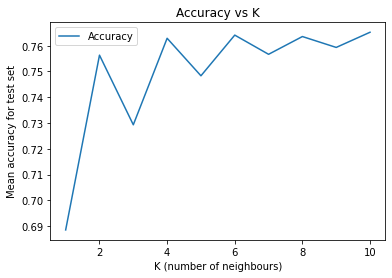

In [10]:
fig = plt.figure()
ax = plt.axes()
plt.plot([1,2,3,4,5,6,7,8,9,10], accuracyKNN, label = 'Accuracy')
plt.xlabel('K (number of neighbours)')
plt.ylabel('Mean accuracy for test set')
plt.title('Accuracy vs K')
plt.legend()
plt.savefig('181CO109 KNN accuracy graph.pdf')
plt.show()